In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Function to normalize image to [0, 1]
def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

In [5]:
from sklearn.metrics import mean_squared_error
from skimage import io, img_as_float
from skimage.metrics import structural_similarity as ssim

In [12]:
# Computes MSE between img1 and img2
def show_metrics(img1, img2):
    img1_np = np.array(img1)
    img2_np = np.array(img2)

    img1_flat = img1_np.flatten()
    img2_flat = img2_np.flatten()

    # Compute MSE
    mse = mean_squared_error(img1_flat, img2_flat)
    print(f"Mean Squared Error between the images: {mse}")

    # Compute SSIM
    img1_normalized = normalize_image(img1_np)
    img2_normalized = normalize_image(img2_np)

    ssim_value, ssim_map = ssim(img1_normalized, img2_normalized, data_range=1.0, full=True)
    print(f"SSIM: {ssim_value}")
    
    # Display the SSIM map
    plt.imshow(ssim_map, cmap='gray')
    plt.title(f'SSIM Map (SSIM Value: {ssim_value:.4f})')
    plt.colorbar()
    plt.show()

In [13]:
ground_truth_path = './ICU_TMED_2023_VER.tif'
prediction_path = './interpolation_new_variables.tif'

with rasterio.open(ground_truth_path) as src:
    ground_truth = src.read(1)

with rasterio.open(prediction_path) as src:
    prediction = src.read(1)

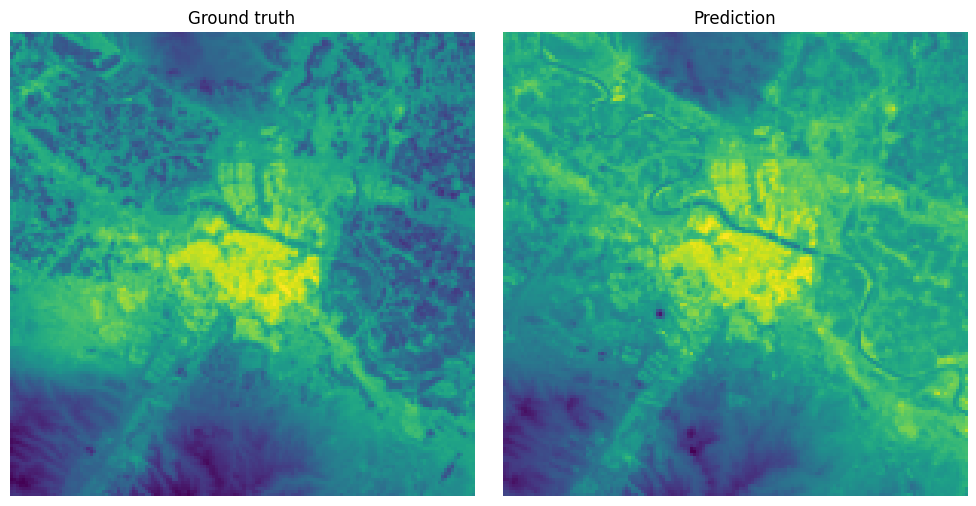

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot images
axes[0].imshow(ground_truth)
axes[0].set_title('Ground truth')
axes[0].axis('off')  # Hide axes

axes[1].imshow(prediction)
axes[1].set_title('Prediction')
axes[1].axis('off')  # Hide axes

# Show the plot
plt.tight_layout()
plt.show()

Mean Squared Error between the images: 0.12426260113716125
SSIM: 0.7142972802680466


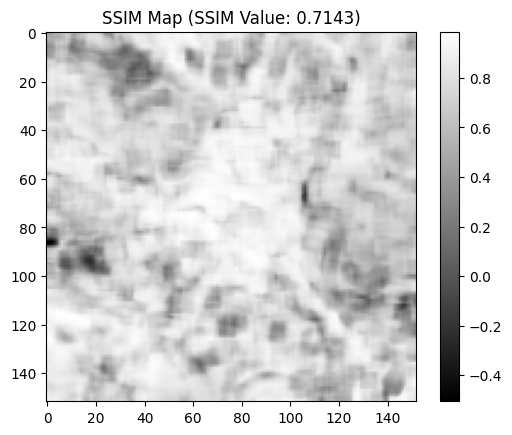

In [14]:
show_metrics(ground_truth, prediction)